In [1]:
f=open("/Users/zhangxiaochen/nbs/study/ocr/freqcn").read()

In [2]:
chars = list(set(list(f)))

In [3]:
letters=list(chr(i) for i in range(97,97+26))
letters2=list(chr(i).upper() for i in range(97,97+26))
numbers=list(str(i) for i in range(10))
chars +=numbers+letters+letters2
chars = list(set(chars))

In [4]:
len(chars)

3566

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [6]:
from glob import glob
import os

fonts=glob("/data/fonts_cn/*")

fonts[:3]

['/data/fonts_cn/msyh.ttf',
 '/data/fonts_cn/SentyChalk.ttf',
 '/data/fonts_cn/SentyCHALKoriginal.ttf']

In [7]:
def rd(scale,start=0):
    return int(np.random.rand()*scale)+start

def rd_font(size):
    return ImageFont.FreeTypeFont(fonts[rd(len(fonts))],size)

def tp2color(rdnb):
    return "#%.2x%.2x%.2x%.2x"%(rdnb[0],rdnb[1],rdnb[2],rdnb[3])

In [8]:
tp2color((rd(255),rd(255),rd(255),rd(200,50)))

'#16567cdb'

In [9]:
%matplotlib inline

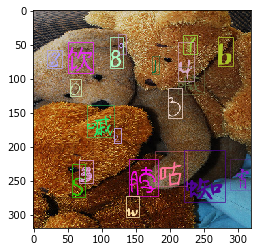

In [37]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


nb_c  = 20
fig,ax = plt.subplots(1)
img = Image.open("/data/coco/val2017/000000000776.jpg").resize((320,320))
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
# draw.text((x, y),"Sample Text",(r,g,b))

# Chinese
for i in range(int(nb_c*.4)):
    f_size=rd(30,30)
    x,y=rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    ft = rd_font(f_size)
    txt = chars[rd(3500)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# lower case
for i in range(int(nb_c*.1)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    
    ft = rd_font(f_size)
    txt = letters[rd(26)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# upper case
for i in range(int(nb_c*.1)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    
    ft = rd_font(f_size)
    txt = letters2[rd(26)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# numbers
for i in range(int(nb_c*.4)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(100,155),rd(100,155),rd(100,155),rd(200,50))
    
    ft = rd_font(f_size)
    txt = numbers[rd(10)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
        
ax.imshow(img)
img.save('/Users/zhangxiaochen/Pictures/001_txt.jpg')
